In [63]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage as ndi
from skimage import io, filters, morphology
from skimage.draw import polygon 
from scipy.ndimage import minimum_filter, gaussian_filter1d  # Added gaussian_filter1d import



In [57]:
image_path = 'C:/Users/ENV/OneDrive - Plymouth Marine Laboratory/vscode/whitecaps/Stbd_2011_07_03_10_00_00.jpg'

In [58]:
im = io.imread(image_path).astype(np.float64)


In [59]:
im_rg = (im[:,:,0] + im[:,:,1]) / 2


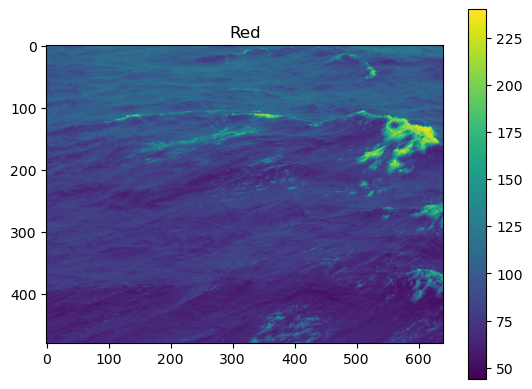

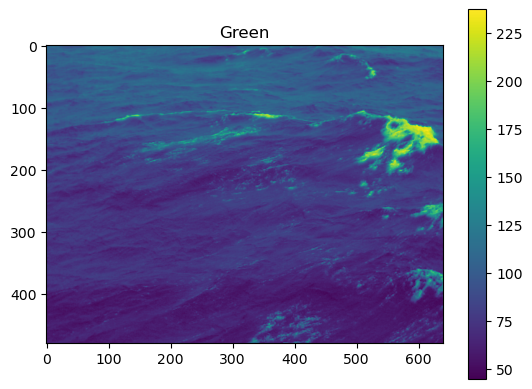

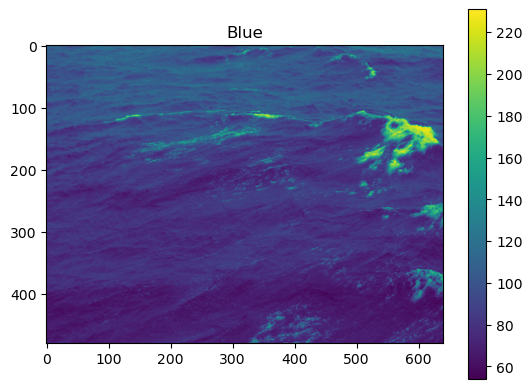

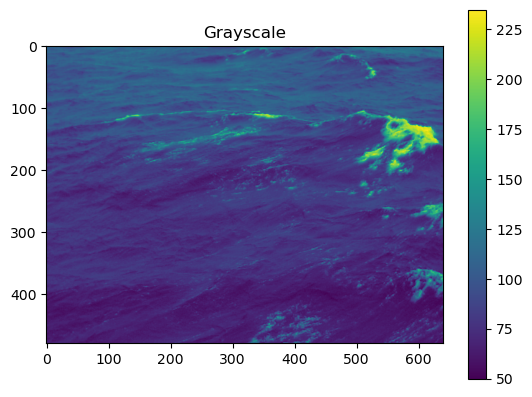

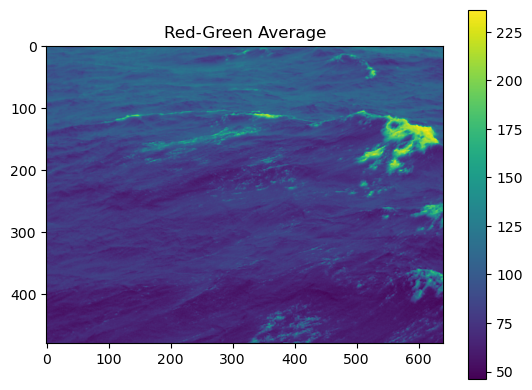

In [5]:
plt.figure(1); plt.imshow(im[:,:,0]); plt.title('Red'); plt.colorbar()
plt.figure(2); plt.imshow(im[:,:,1]); plt.title('Green'); plt.colorbar()
plt.figure(3); plt.imshow(im[:,:,2]); plt.title('Blue'); plt.colorbar()
plt.figure(4); plt.imshow(np.mean(im, axis=2)); plt.title('Grayscale'); plt.colorbar()
plt.figure(5); plt.imshow(im_rg); plt.title('Red-Green Average'); plt.colorbar()


In [6]:
nr, _ = im_rg.shape
BW=np.zeros(im_rg.shape, dtype=bool)
BW[polygon([nr, 500, nr, nr], [2300, 4000, 4000, 2300], shape=im_rg.shape)] = True


In [7]:
blank_indices = np.where(BW)


In [8]:
im_processed = im_rg.copy()
im_processed[blank_indices] = 2

In [9]:
background = minimum_filter(im_processed, size=150)


In [10]:
im_processed[blank_indices] = np.nan
background[blank_indices] = np.nan


In [11]:
background_smoothed = filters.gaussian(background, sigma=30)

# Subtract background
im_subtracted = im_processed - background_smoothed

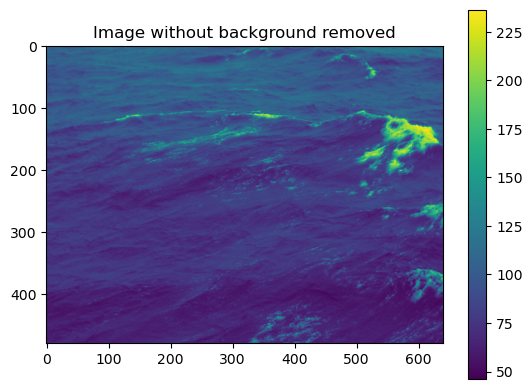

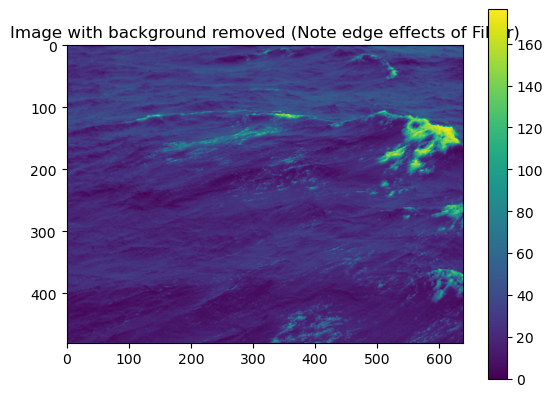

In [12]:
plt.figure(1)
plt.clf()
plt.title('Image without background removed')
plt.imshow(im_rg)
plt.colorbar()

plt.figure(2)
plt.clf()
plt.title('Image with background removed (Note edge effects of Filter)')
plt.imshow(im_subtracted)
plt.colorbar()

In [13]:
intensity_vector = np.arange(0, np.nanmax(im_subtracted)*0.9, 0.01)
'''
np.nanmax(im_crop_subtracted): Finds the maximum intensity value in the image, ignoring NaN values.
*0.9: Multiplies by 0.9 to avoid extreme outliers at the maximum intensity.
np.arange(start, stop, step): Creates a range of intensity thresholds from 0 to 90% of the max intensity with a step size of 0.01. 
'''

# Calculate the PIP
hist, bin_edges = np.histogram(im_subtracted[~np.isnan(im_subtracted)], 
                                bins=intensity_vector)

'''
Counts how many pixel intensities fall within each range (bin) defined by the intensty vector
    Excludes NaN values to ensure valid calculations.
np.histogram: Computes the histogram, returning:
hist: Counts of pixels in each bin.
bin_edges: The boundaries of the bins.
'''

# Flip to start at highest intensity threshold to lowest
hist_reversed = hist[::-1]
bin_edges_reversed = bin_edges[::-1]

# Get cumulative sum at each successively lower intensity
cumulative_sum = np.cumsum(hist_reversed)



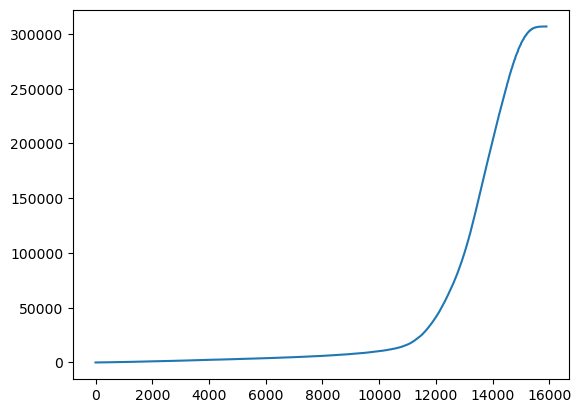

In [37]:
plt.plot(cumulative_sum)
plt.show()

In [60]:
epsilon = 1e-10  # Small constant to prevent division by zero

pip = np.gradient(cumulative_sum)/(cumulative_sum+epsilon)


In [61]:
pip_smoothed = filters.gaussian_filter1d(pip, sigma=5)

# Calculate first and second derivatives
grad_pip = np.gradient(pip_smoothed[::-1]) #reversed bc reversed histogram



AttributeError: No skimage.filters attribute gaussian_filter1d

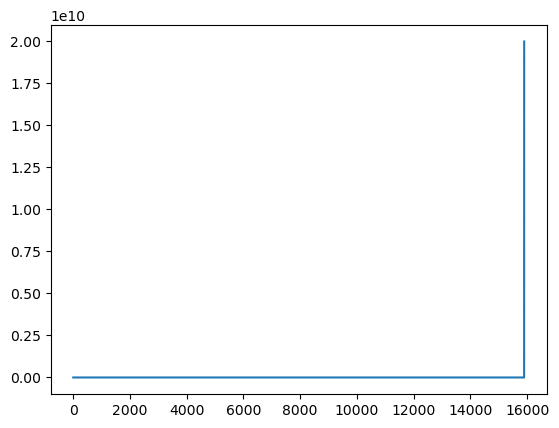

In [43]:
plt.plot(grad_pip)
plt.show()

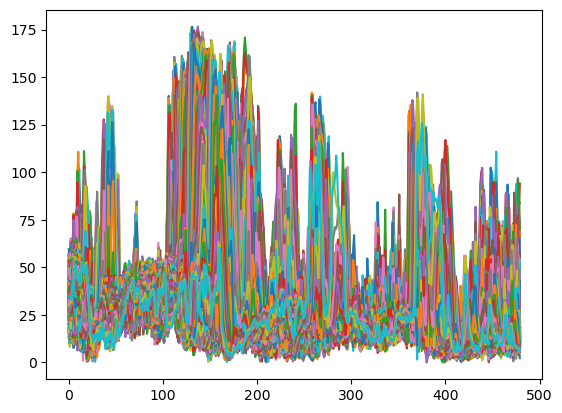

In [47]:
plt.plot(im_subtracted)
plt.show()

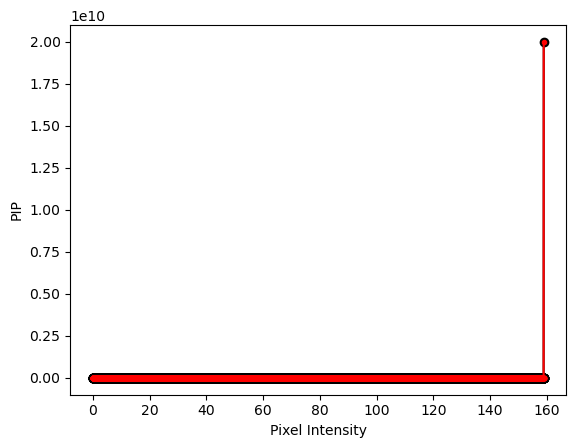

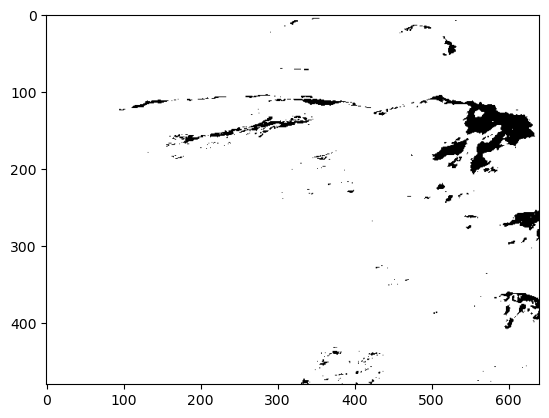

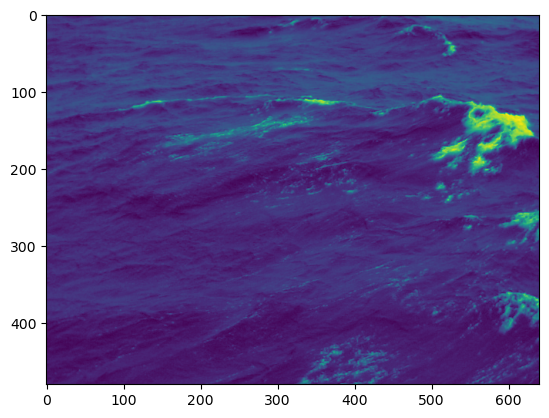

In [55]:
# Display image structure
plt.figure(3)
plt.clf()
plt.plot(bin_edges_reversed[:-1], pip, '-ko')
plt.plot(bin_edges_reversed[:-1], pip, '-r.')
plt.xlabel('Pixel Intensity')
plt.ylabel('PIP')



# Binary threshold for whitecaps
whitecap_mask = im_subtracted >65
plt.figure(5)
plt.imshow(whitecap_mask, cmap='binary')

plt.figure(6)
plt.imshow(im_subtracted)

plt.show()